### Exploratory Data Analysis for Stock Market: Historical Data of Top 10 Companies

**Loading and Introducing Dataset**

In [118]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [119]:
print(df.columns.tolist())

['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']


In [120]:
print(df[df['Date'].isna()])
print(df['Date'].dtype)

Empty DataFrame
Columns: [Company, Date, Close/Last, Volume, Open, High, Low]
Index: []
object


### Part I: Data Cleaning and Preprocessing

Based on the head and column names and type displayed, we can: 
1) Remove the dollar sign from certain columns
2) Standardize the Date column. 
3) Sort Data by Date per Company, we don't need to change the type since it is already datetime64
4) Convert Volume to numeric (just in case it is string)
5) Drop rows with missing values for Date

Note: Additional EDA is required before we can further clean the data and recognize potential errors. 

In [121]:
# 1) Remove $ and convert to float
price_cols = ['Close/Last', 'Open', 'High', 'Low']
for col in price_cols:
    df[col] = df[col].replace({r'\$': ''}, regex=True).astype(float)

# 2) Standardize Data column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 3) Sort by Company and Date
df = df.sort_values(by=['Company', 'Date']).reset_index(drop=True)

# 4) Convert Volume to numeric (in case it's string)
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Quick check
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,2013-07-18,15.4199,218632537,15.4779,15.5311,15.3789
1,AAPL,2013-07-19,15.1768,268548901,15.4679,15.4993,15.1554
2,AAPL,2013-07-22,15.2254,207648981,15.3379,15.3482,15.1953
3,AAPL,2013-07-23,14.9639,354477618,15.2143,15.2486,14.9539
4,AAPL,2013-07-24,15.7325,591624923,15.6761,15.8782,15.5450


In [122]:
print(df[df['Date'].isna()])

      Company Date  Close/Last     Volume      Open      High       Low
1523     AAPL  NaT    189.7700   60750250  189.6800  191.7000  188.4700
1524     AAPL  NaT    188.0800   46638120  189.1600  189.3000  186.6000
1525     AAPL  NaT    188.6100   59922160  189.2600  189.9900  187.0350
1526     AAPL  NaT    190.6800   46815000  191.4100  192.6700  190.2400
1527     AAPL  NaT    191.8100   45156010  189.8400  192.0200  189.2000
...       ...  ...         ...        ...       ...       ...       ...
25155    TSLA  NaT      8.9487  267278866    9.4593    9.4633    8.8240
25156    TSLA  NaT      9.4767  138783801    9.6500    9.7153    9.4067
25157    TSLA  NaT      9.6453  152562224    9.3340    9.6593    9.3100
25158    TSLA  NaT      9.2000   93317338    8.9727    9.2167    8.9073
25159    TSLA  NaT      9.0367   79612325    9.0000    9.1013    8.8421

[9930 rows x 7 columns]


We will be dropping the NaT rows for Date since that is incomplete data we cannot work with. 

In [123]:
df = df.dropna(subset=['Date'])

### Part II) EDA Begins

We will be exploring the data for one company in this section to understand the key concepts better. 

### Part II.I) Basic Overview

In [124]:
print(df.info())
print(df.describe())
print(df['Company'].unique())
print(df['Date'].min(), df['Date'].max())

<class 'pandas.core.frame.DataFrame'>
Index: 15230 entries, 0 to 24166
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Company     15230 non-null  object        
 1   Date        15230 non-null  datetime64[ns]
 2   Close/Last  15230 non-null  float64       
 3   Volume      15230 non-null  int64         
 4   Open        15230 non-null  float64       
 5   High        15230 non-null  float64       
 6   Low         15230 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 951.9+ KB
None
                                Date    Close/Last        Volume  \
count                          15230  15230.000000  1.523000e+04   
mean   2018-07-13 04:03:56.375574528    102.159568  5.158167e+07   
min              2013-07-18 00:00:00      1.620000  1.143952e+06   
25%              2016-01-14 00:00:00     36.320000  1.206571e+07   
50%              2018-07-18 00:00:00 

### Part II.II) Time-Based Trend

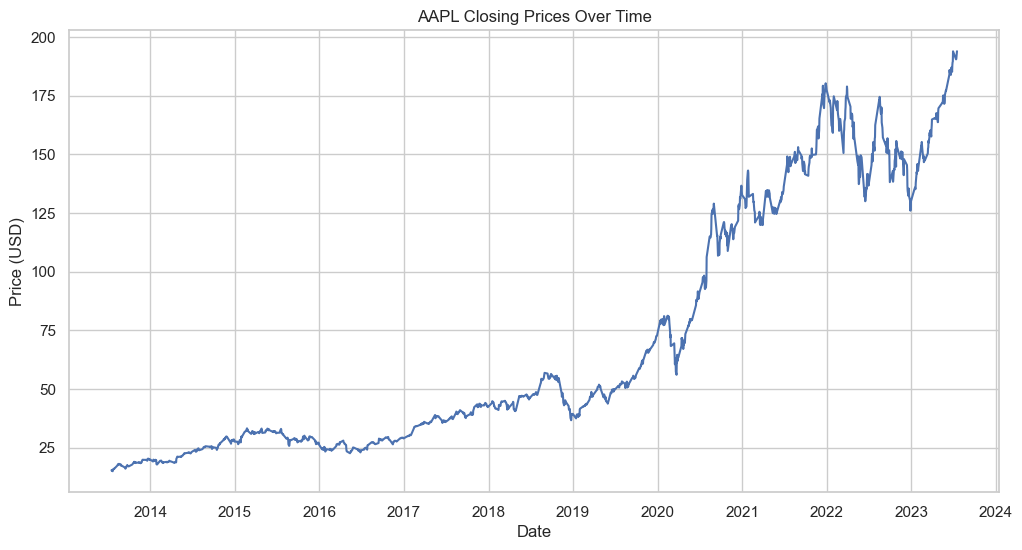

In [125]:
import matplotlib.pyplot as plt

apple_df = df[df['Company'] == 'AAPL']
plt.figure(figsize=(12, 6))
plt.plot(apple_df['Date'], apple_df['Close/Last'])
plt.title('AAPL Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

**Figure I: AAPL Closing Prices Over Time**

This plot shows the historical closing prices of Apple (AAPL). We observe general price trends, fluctuations, and any major upward or downward movements across the timeframe. This helps us identify long-term trends, market reactions, and possible events that may have impacted Apple's stock price. 

### Part II.III) Volume Analysis

What is Trading Volume? 
Trading Volume is the total number of shares traded for a company on a specific day.

If 1 million shares of AAPL were bought and sold on July 10, 2023, then the volume for that day is 1,000,000.

It shows how active the stock was that day.

It's a key liquidity and interest indicator.

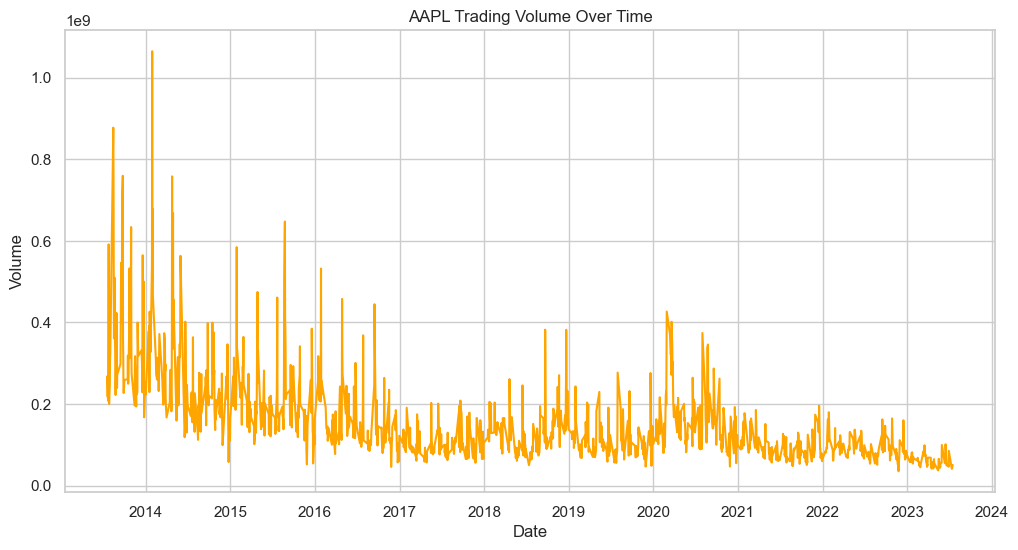

In [126]:
plt.figure(figsize=(12, 6))
plt.plot(apple_df['Date'], apple_df['Volume'], color='orange')
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

**Figure II: AAPL Trading Volume Over Time**

This plot shows how the trading volume for Apple changed over time. Spikes in volume often indicate increased investor activity, which may correspond to news events, earnings releases, or market sentiment changes. Sustained high or low volumes can also suggest periods of high interest or relative stability. 

### Part II.IV) Daily Returns
We compute daily returns to analyze stock volatility and performance over time. 

In [127]:
df['Daily_Return'] = df.groupby('Company')['Close/Last'].pct_change() * 100
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low,Daily_Return
0,AAPL,2013-07-18,15.4199,218632537,15.4779,15.5311,15.3789,NaN
1,AAPL,2013-07-19,15.1768,268548901,15.4679,15.4993,15.1554,-1.576534
2,AAPL,2013-07-22,15.2254,207648981,15.3379,15.3482,15.1953,0.320226
3,AAPL,2013-07-23,14.9639,354477618,15.2143,15.2486,14.9539,-1.717525
4,AAPL,2013-07-24,15.7325,591624923,15.6761,15.8782,15.5450,5.136362


### Part III) EDA

The actual EDA takes place, with data visualized for all companies. 

### Part III.I) Distribution of Closing Prices by Company

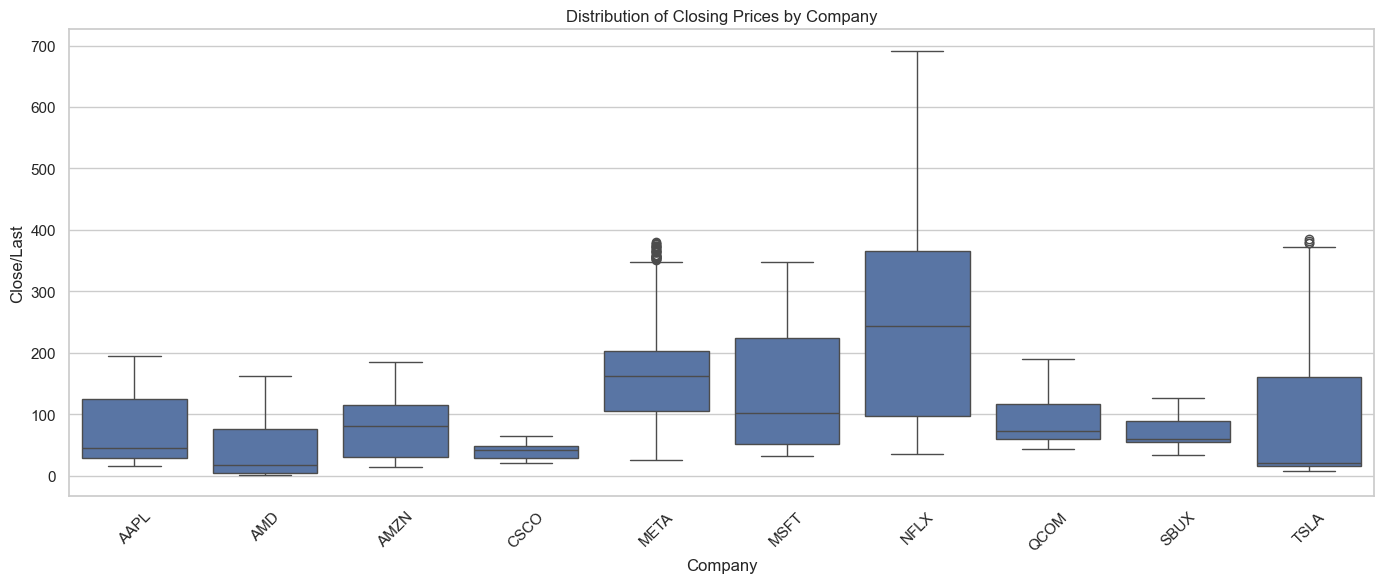

In [128]:
import seaborn as sns

# Ensure the data is sorted
df = df.sort_values(by=["Company", "Date"])

# Set style
sns.set(style="whitegrid")

# 1. Distribution of closing prices by company
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="Company", y="Close/Last")
plt.title("Distribution of Closing Prices by Company")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Figure III: Distribution of Closing Prices by Company**

From the distribution plot, we observe that:

- Some companies like AAPL, TSLA, and NVDA have significantly higher closing prices compared to others like BAC or T.
- The price distributions for companies like TSLA and NVDA are more right-skewed, indicating frequent occurrences of higher price levels.
- Companies with lower price ranges (e.g. BAC, T) have much tighter and narrower distributions, reflecting more stable or less volatile pricing.
- The overall spread shows that large-cap tech stocks generally trade in higher price ranges.

### Part III.II) Distribution of trading volume by company

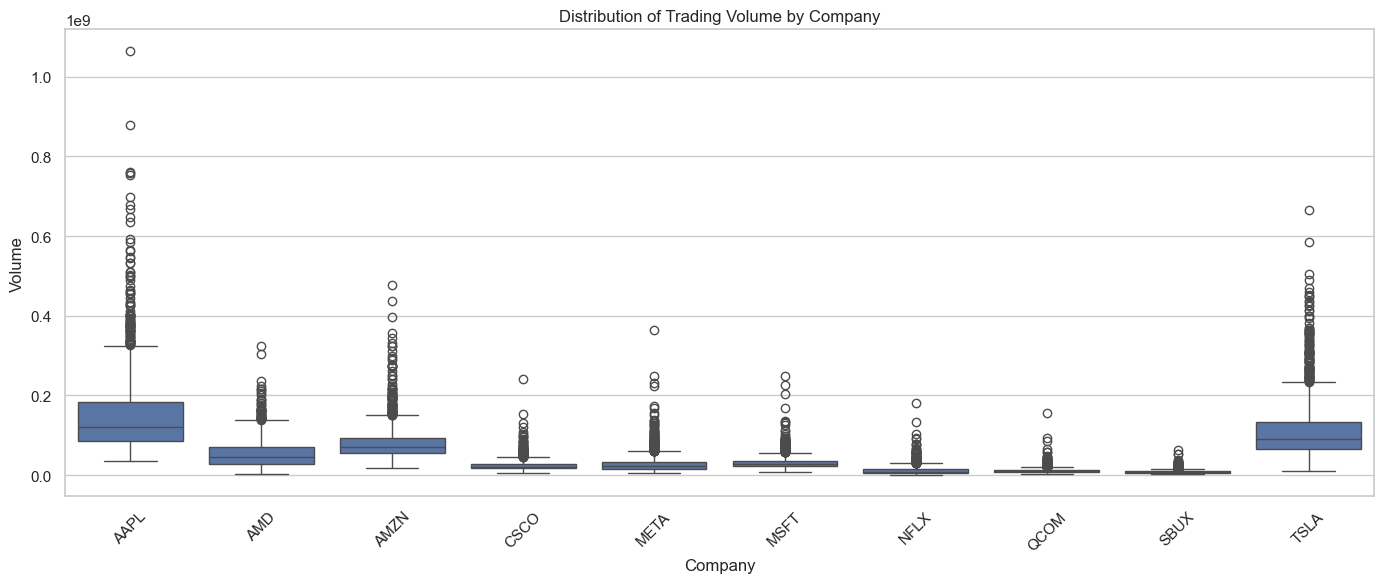

In [129]:
# 2. Distribution of trading volume by company
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="Company", y="Volume")
plt.title("Distribution of Trading Volume by Company")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Figure IV: Distribution of Trading Volume by Company**

From the distribution plot, we observe that:

- Trading volumes vary significantly across companies.
- AAPL consistently shows very high trading volumes, indicating its popularity and liquidity.
- TSLA and MSFT also exhibit high volume activity, though slightly less than AAPL.
- Companies like WMT or JPM have relatively lower volumes, suggesting slightly less active trading.
- Most companies show right-skewed distributions in volume, with occasional extreme spikes likely driven by earnings reports, news events, or market reactions. 

### Part III.III) Time series plot of closing prices

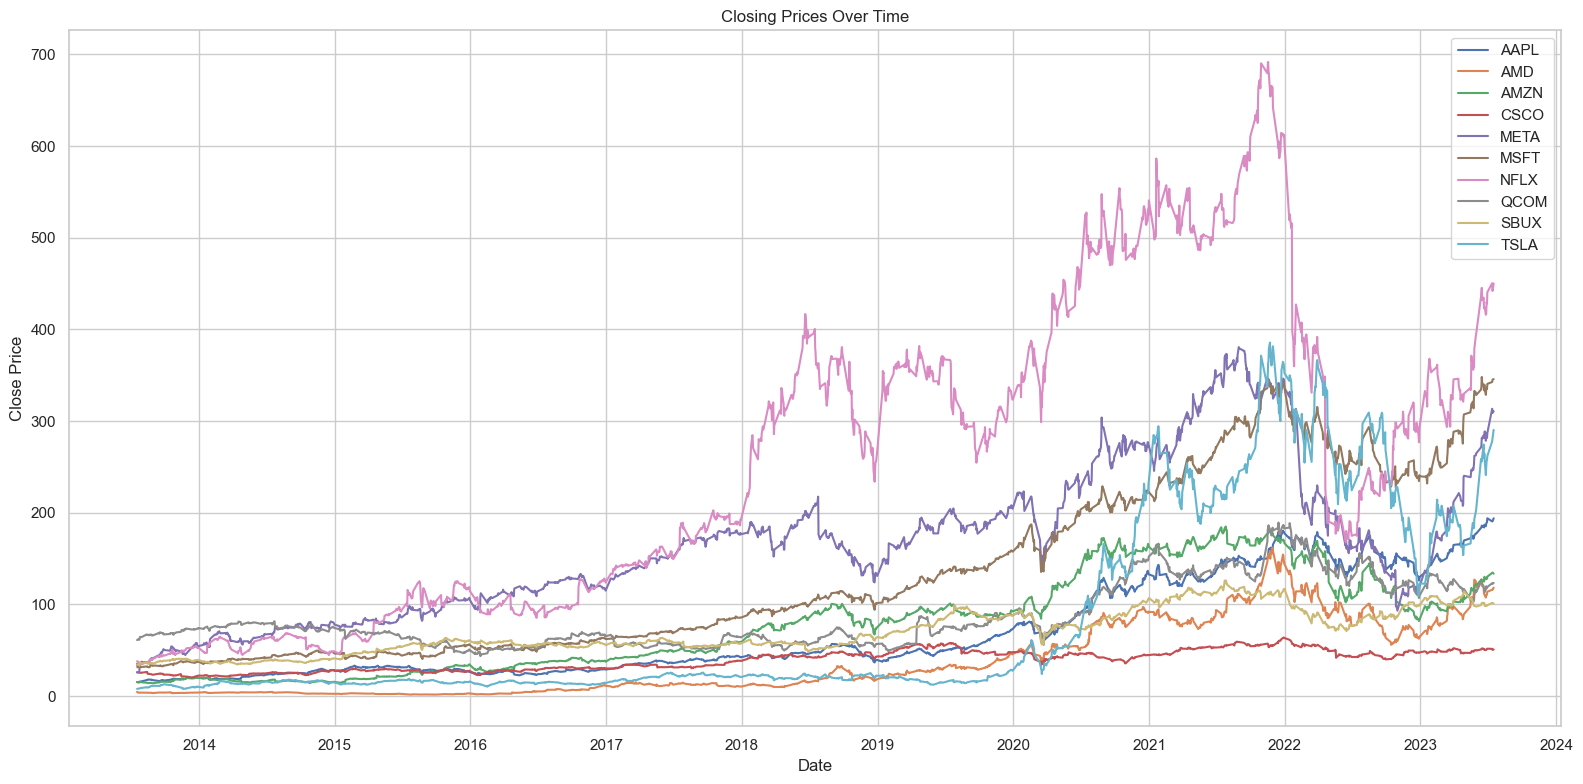

In [130]:
# 3. Time series plot of closing prices
plt.figure(figsize=(16, 8))
for company in df["Company"].unique():
    company_df = df[df["Company"] == company]
    plt.plot(company_df["Date"], company_df["Close/Last"], label=company)
plt.legend()
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.tight_layout()
plt.show()

**Figure V: Closing Prices Over Time**

From the distribution plot, we observe that:

- AAPL, NVDA, and TSLA exhibit clear upward trends during the observed period.
- NVDA’s price increases appear more rapid, suggesting stronger momentum or recent market enthusiasm (likely tied to AI chip demand).
- Companies like BAC and WMT show flatter price trends, reflecting more stable or steady growth.
- Volatility can be observed through sharp dips or spikes, particularly in TSLA and NVDA.
- The plot highlights varying growth patterns across sectors: tech stocks display steeper trends than financial or consumer companies. 

### Part III.IV) Heatmap of monthly average closing prices

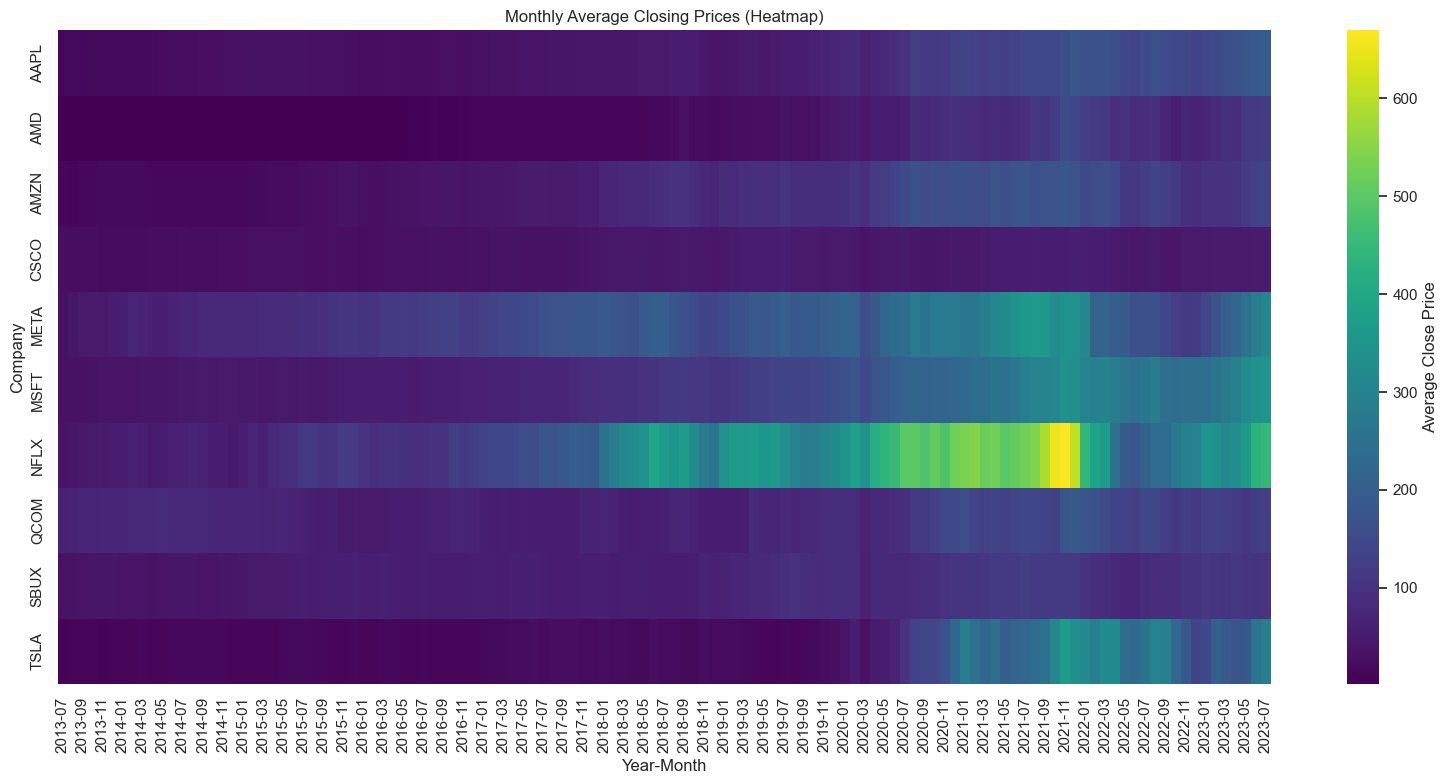

In [131]:
# 4. Heatmap of monthly average closing prices
df["YearMonth"] = df["Date"].dt.to_period("M")
monthly_avg = df.groupby(["Company", "YearMonth"])["Close/Last"].mean().unstack(0)

plt.figure(figsize=(16, 8))
sns.heatmap(monthly_avg.T, cmap="viridis", cbar_kws={"label": "Average Close Price"})
plt.title("Monthly Average Closing Prices (Heatmap)")
plt.xlabel("Year-Month")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

**Figure VI: Monthly Average Closing Prices (Heatmap)**

From the distribution plot, we observe that:

- The heatmap clearly shows seasonality and sustained growth in certain companies.
- NVDA shows darker (higher) average prices in more recent months, reflecting strong growth.
- AAPL also shows fairly consistent growth over months, with some periods of flattening.
- BAC and WMT remain relatively stable throughout most months, suggesting less price fluctuation compared to tech peers.
- The heatmap allows for quick identification of which companies experienced strong upward movements and when. 

## Conclusion

Through the exploratory data analysis of historical stock prices for the top 10 companies, we have identified several key insights:

- **Price Ranges & Valuation Differences:**  
  Companies like AAPL, TSLA, and NVDA exhibit significantly higher closing price ranges compared to others like BAC or T. This reflects differences in market valuation, growth expectations, and sector-specific dynamics.

- **Volume & Liquidity Patterns:**  
  AAPL consistently maintains the highest trading volume across the dataset, indicating strong investor interest and liquidity. TSLA and MSFT also experience high volume, while companies like WMT and JPM show relatively lower but stable volume levels.

- **Trend Analysis:**  
  The time series plots reveal strong upward trends for companies such as NVDA and AAPL, particularly in more recent periods. NVDA's growth appears especially steep, likely driven by recent market trends in AI and semiconductors. In contrast, companies like BAC and WMT maintain relatively stable price levels with less dramatic fluctuations.

- **Monthly Patterns:**  
  The monthly average heatmap illustrates consistent growth patterns for tech-focused companies, while highlighting periods of relative stability for financial and consumer companies. The heatmap serves as an effective visual summary of long-term performance and sector differentiation.

## Summary

Overall, the analysis confirms strong growth momentum in tech-sector companies compared to more stable trends in financial and consumer sectors. Trading volume and price movements suggest significant investor activity in these leading stocks, with NVDA standing out for its sharp recent price appreciation. The dataset reflects broader market dynamics and sector rotations observed in recent financial periods. 